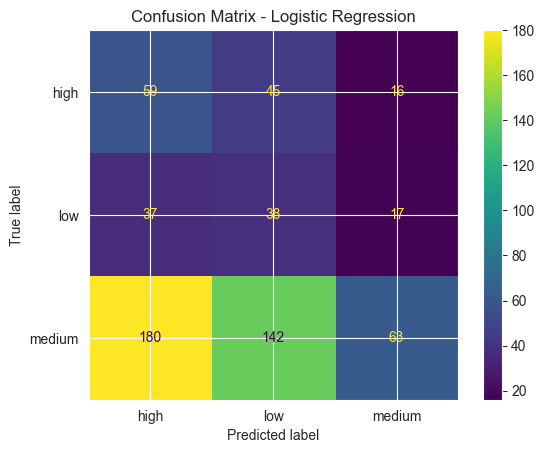

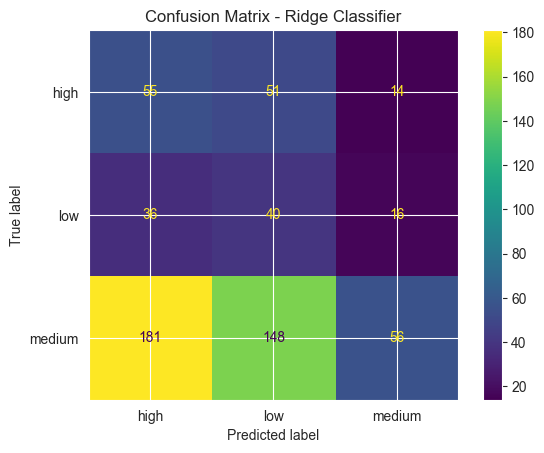

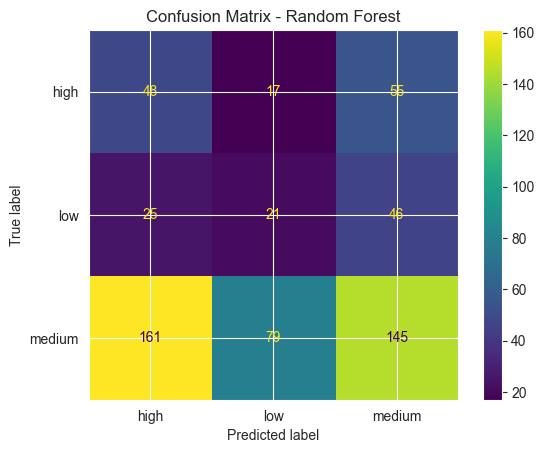

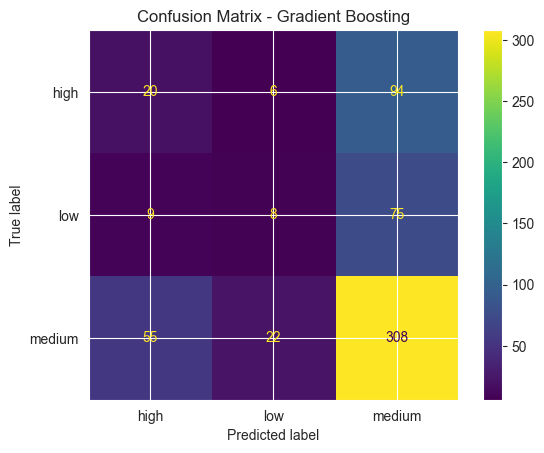

In [4]:
from sklearn.svm import SVR
# Usability Score Regression Model Summary

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.optimize import nnls
from sklearn.metrics import accuracy_score, classification_report
# Bar chart of correlations
import matplotlib.pyplot as plt
# Load and preprocess evaluation data
eval_df = pd.read_csv('../eval/uicrit/uicrit_eval_results_gradcam.csv')

# Transform metrics
eval_df['entropy_score'] = 1 - eval_df['entropy'] / 10
eval_df['clusters_score'] = 1 / (1 + eval_df['num_clusters'])
cog_x = eval_df['center_of_gravity_x']
cog_y = eval_df['center_of_gravity_y']
eval_df['center_of_gravity_score'] = 1 - np.minimum(np.sqrt((cog_x - 0.5)**2 + (cog_y - 0.5)**2) / 0.71, 1)

# Use normalized transformed features
X = eval_df[[
    'entropy_score',
    'clusters_score',
    'center_of_gravity_score',
    'symmetry_score',
    'visual_coverage',
    'placement_score']]

# Convert regression target to classification buckets (low, medium, high)
def label_class(y):
    if y <= 4:
        return 'low'
    elif y <= 6:
        return 'medium'
    else:
        return 'high'

# Split data for train/test validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# Use X_train, y_train for training; X_test, y_test for evaluation
y = eval_df['usability_rating'].apply(label_class)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




results = {}

# Dummy Classifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Logistic Regression with class weighting
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)
results['LogisticRegression'] = {
    'accuracy': accuracy_score(y_test, y_lr),
    'report': classification_report(y_test, y_lr, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, y_lr)
}

ConfusionMatrixDisplay.from_predictions(y_test, y_lr)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()




# Ridge Classifier with balanced class weights
ridge = RidgeClassifier(class_weight='balanced')
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)
results['RidgeClassifier'] = {
    'accuracy': accuracy_score(y_test, y_ridge),
    'report': classification_report(y_test, y_ridge, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, y_ridge)
}

ConfusionMatrixDisplay.from_predictions(y_test, y_ridge)
plt.title("Confusion Matrix - Ridge Classifier")
plt.show()


# Random Forest Classifier with class balancing
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
results['RandomForest'] = {
    'accuracy': accuracy_score(y_test, y_rf),
    'report': classification_report(y_test, y_rf, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, y_rf)
}

ConfusionMatrixDisplay.from_predictions(y_test, y_rf)
plt.title("Confusion Matrix - Random Forest")
plt.show()


# Gradient Boosting Classifier (no class_weight param available natively)
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)
y_gbr = gbr.predict(X_test)
results['GradientBoosting'] = {
    'accuracy': accuracy_score(y_test, y_gbr),
    'report': classification_report(y_test, y_gbr, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, y_gbr)
}

ConfusionMatrixDisplay.from_predictions(y_test, y_gbr)
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

